<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 20-11-2023
```

**Import Libraries**

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from time import time
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

**Importing Dataset**

In [2]:
data = load_wine()

**Dataset Info**

[wine datset link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

*https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html*



```
The wine dataset is a classic and very easy multi-class classification dataset.

Classes 3

Samples per class [59,71,48]

Samples total 178

Dimensionality 13

Features real, positive
```



**Data Analysis and Data Preprocessing**

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df = load_wine(as_frame=True)
df = df.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df['target'].value_counts().rename(index={0:'class_0',1:'class_1',2:'class_2'})

class_1    71
class_0    59
class_2    48
Name: target, dtype: int64

<Axes: >

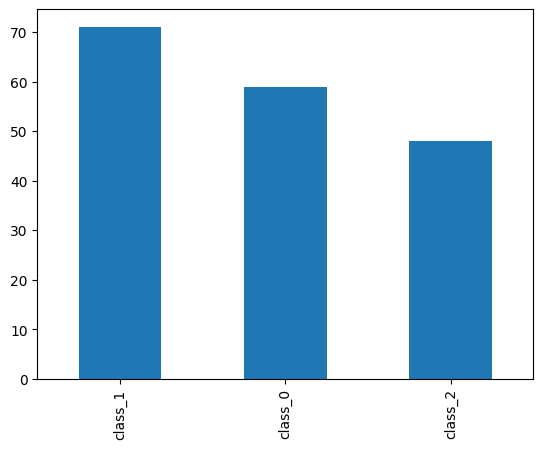

In [9]:
df['target'].value_counts().rename(index={0:'class_0',1:'class_1',2:'class_2'}).plot.bar()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [11]:
df.drop('target', axis =1, inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Data Standardization**

In [12]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [14]:
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [15]:
X = df_scaled.values

In [16]:
y = data.target

**KMeans Clustering**



```
 class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++',  
 n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None,
 copy_x=True, algorithm='lloyd')
```



**Implementation of KMeans Clustering**

In [17]:
t = []
inertia_values = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [18]:
initial_time = time()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init= 'auto', random_state = 42)
kmeans.fit(X)
total_time = time() - initial_time
t.append(total_time)
inertia_values.append(kmeans.inertia_)
ARI.append(adjusted_rand_score(y, kmeans.labels_))
SilhouetteScore.append(silhouette_score(X, kmeans.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, kmeans.labels_))

In [19]:
results_df=pd.DataFrame(list(zip(t,inertia_values,ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'Inertia', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=["Model_KMeans"])
results_df

,Time,Inertia,ARI,Silhouette Score,Davies Bouldin Score
Model_KMeans,0.036434,1279.966153,0.8804,0.284421,1.393801


**Visualize the results on PCA-reduced data**

In [20]:
initial_time = time()
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init= 'auto', random_state = 42)
kmeans.fit(reduced_data)
total_time = time() - initial_time
print("Time Taken to Implement the Model : ", total_time)

Time Taken to Implement the Model :  0.024294614791870117


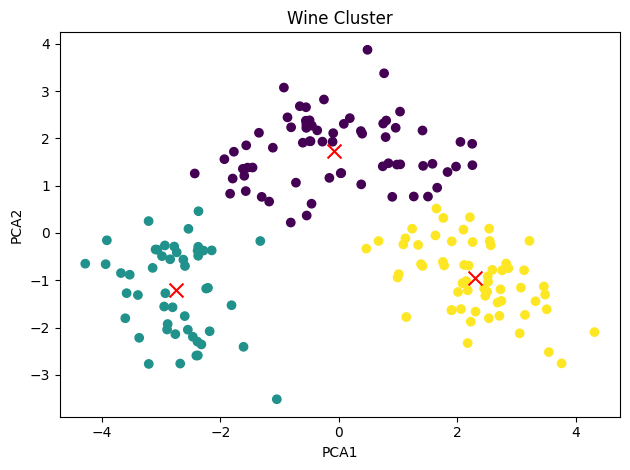

In [21]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()
plt.show()

**Experimenting on Parameters and Observing the changes in the Result**

**parameter : n_clusters**


In [22]:
inertia_values = {}

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init= 'auto', random_state = 42)
  kmeans.fit(X)
  inertia_values[i] = kmeans.inertia_

inertia_values.values()

dict_values([2314.0, 1659.9511977619795, 1279.9661527749454, 1188.5445523622493, 1130.694057934998, 1072.0586416944398, 1031.5262309011282, 955.6366693022505, 908.5382248571018, 879.6779033567796])

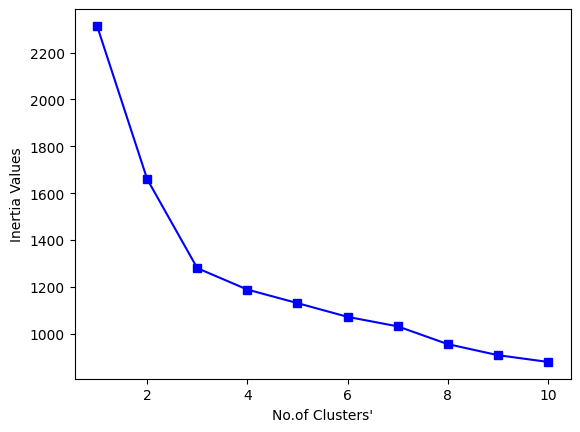

In [23]:
plt.plot(inertia_values.keys(), inertia_values.values(), '-sb')
plt.xlabel("No.of Clusters'")
plt.ylabel('Inertia Values')
plt.show()

**Here, We use Elbow method to determine the optimal number of clusters and it can be seen the graph forms an elbow at 3**

**Result: Best value for n_clusters is 3**

**parameter : init**

In [24]:
t = []
inertia_values = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []


In [25]:
initial_time = time()
model_1 = KMeans(n_clusters=3, init='k-means++', n_init= 'auto', random_state = 42)
model_1.fit(X)
total_time = time() - initial_time
t.append(total_time)
inertia_values.append(model_1.inertia_)
ARI.append(adjusted_rand_score(y, model_1.labels_))
SilhouetteScore.append(silhouette_score(X, model_1.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, model_1.labels_))

In [26]:
initial_time = time()
model_2 = KMeans(n_clusters=3, init='random', n_init= 'auto', random_state = 42)
model_2.fit(X)
total_time = time() - initial_time
t.append(total_time)
inertia_values.append(model_2.inertia_)
ARI.append(adjusted_rand_score(y, model_2.labels_))
SilhouetteScore.append(silhouette_score(X, model_2.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, model_2.labels_))

In [27]:
results_df=pd.DataFrame(list(zip(t,inertia_values,ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'Inertia', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=['Model_KMeans', "Model_Random"])

In [28]:
results_df

,Time,Inertia,ARI,Silhouette Score,Davies Bouldin Score
Model_KMeans,0.025498,1279.966153,0.880400,0.284421,1.393801
Model_Random,0.021582,1277.928489,0.897495,0.284859,1.389188


**Here, we can observe that init random value gives better results compared to init k-means++ value**

**Result: Best value for init is random**

**parameter : n_init**

In [29]:
inertia_values = {}

for i in range(4, 20):
  kmeans = KMeans(n_clusters = 3, init = 'random', n_init= i, random_state = 42)
  kmeans.fit(X)
  inertia_values[i] = kmeans.inertia_

inertia_values.values()

dict_values([1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423])

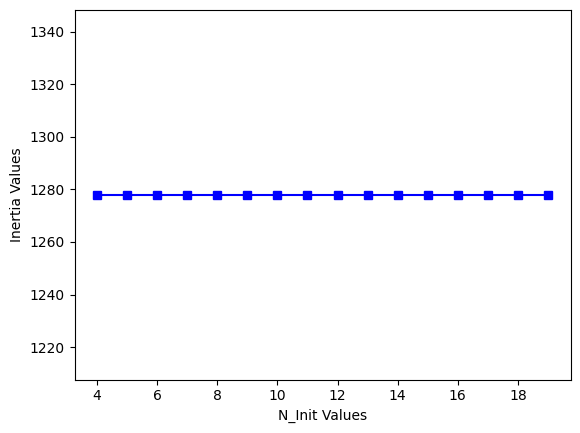

In [30]:
plt.plot(inertia_values.keys(), inertia_values.values(), '-sb')
plt.xlabel("N_Init Values")
plt.ylabel('Inertia Values')
plt.show()

**Here, we can observe that n_init value is same for all the results. Therefore we can take the best result as the default n_init value 10**

**Result: Best value for n_init is 10**

**parameter : max_iter**

In [31]:
inertia_values = {}

for i in range(200, 600, 100):
  kmeans = KMeans(n_clusters = 3, init = 'random', n_init= 10, max_iter = i, random_state = 42)
  kmeans.fit(X)
  inertia_values[i] = kmeans.inertia_

inertia_values.values()

dict_values([1277.9284888446423, 1277.9284888446423, 1277.9284888446423, 1277.9284888446423])

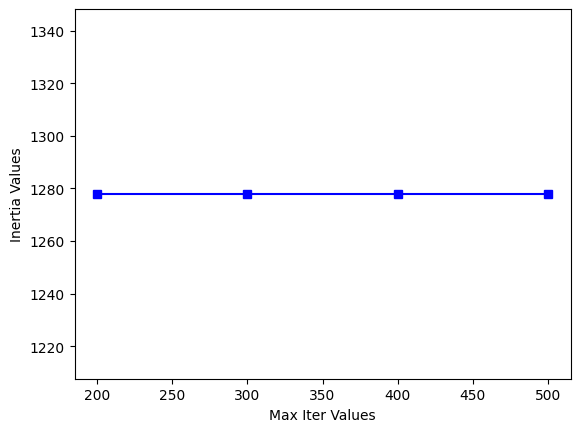

In [32]:
plt.plot(inertia_values.keys(), inertia_values.values(), '-sb')
plt.xlabel("Max Iter Values")
plt.ylabel('Inertia Values')
plt.show()

**Here, we can observe that max_iter value is same for all the results. Therefore we can take the best result as the default max_iter value 300**

**Result: Best value for max_iter is 300**

**Implementation of KMeans Clustering with best parameters**

In [33]:
t = []
inertia_values = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [34]:
initial_time = time()
kmeans_best = KMeans(n_clusters=3, init='random', n_init= 10, max_iter= 300, random_state = 42)
kmeans_best.fit(X)
total_time = time() - initial_time
t.append(total_time)
inertia_values.append(kmeans_best.inertia_)
ARI.append(adjusted_rand_score(y, kmeans_best.labels_))
SilhouetteScore.append(silhouette_score(X, kmeans_best.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, kmeans_best.labels_))

In [35]:
results_df=pd.DataFrame(list(zip(t,inertia_values,ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'Inertia', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=["Model_Best_Params"])
results_df

,Time,Inertia,ARI,Silhouette Score,Davies Bouldin Score
Model_Best_Params,0.028636,1277.928489,0.897495,0.284859,1.389188


**Agglomerative Clustering**



```
  class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *,
  affinity='deprecated', metric=None, memory=None, connectivity=None,
  compute_full_tree='auto', linkage='ward', distance_threshold=None,
  compute_distances=False)
```



**Implementation of Agglomerative Clustering**

In [36]:
t = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [37]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [38]:
results_agg_df=pd.DataFrame(list(zip(t, ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=["Agg_Model"])

In [39]:
results_agg_df

,Time,ARI,Silhouette Score,Davies Bouldin Score
Agg_Model,0.014143,0.789933,0.277444,1.418592


**Visualize the results on PCA-reduced data**

In [40]:
initial_time = time()
reduced_data = PCA(n_components=2).fit_transform(X)
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(reduced_data)
total_time = time() - initial_time
print("Time Taken to Implement the Model : ", total_time)

Time Taken to Implement the Model :  0.013046026229858398


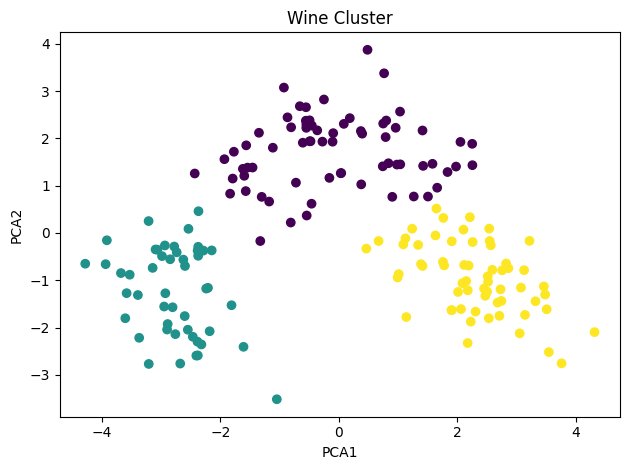

In [41]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=agg_model.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

**Experimenting on Parameters and Observing the changes in the Result**

**For finding n_clusters parameter best value, we use dendogram method**

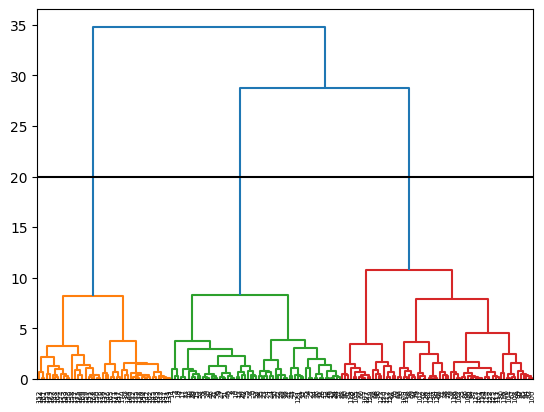

In [42]:
dendogram = shc.dendrogram((shc.linkage(reduced_data, method ='ward')))
plt.axhline(y=20, c='k')
plt.show()

**To determine the optimal number of clusters by visualizing the data, imagine all the horizontal lines as being completely horizontal and then after calculating the maximum distance between any two horizontal lines, draw a horizontal line in the maximum distance calculated.**

**Here, the optimal number of cluster can be found at number 3**

**parameter : metric, linkage**

In [43]:
t = []
metric = []
linkage = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [44]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("euclidean")
linkage.append("ward")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [45]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("euclidean")
linkage.append("average")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [46]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='average')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("cosine")
linkage.append("average")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [47]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("manhattan")
linkage.append("average")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [48]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='l1', linkage='average')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("l1")
linkage.append("average")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [49]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='l2', linkage='average')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("l2")
linkage.append("average")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [50]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='complete')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("cosine")
linkage.append("complete")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [51]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='complete')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("manhattan")
linkage.append("complete")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [52]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='l1', linkage='complete')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("l1")
linkage.append("complete")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [53]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='l2', linkage='complete')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
metric.append("l2")
linkage.append("complete")
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [54]:
results_agg_df=pd.DataFrame(list(zip(metric,linkage,t,ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Metric', 'Linkage', 'Time', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=['Model_E_W', "Model_E_A", "Model_C_A", "Model_M_A", "Model_L1_A", "Model_L2_A", "Model_C_C", "Model_M_C", "Model_L1_C", "Model_L2_C"])

In [55]:
results_agg_df

,Metric,Linkage,Time,ARI,Silhouette Score,Davies Bouldin Score
Model_E_W,euclidean,ward,0.011558,0.789933,0.277444,1.418592
Model_E_A,euclidean,average,0.010572,-0.005442,0.157525,1.029890
Model_C_A,cosine,average,0.010860,0.784706,0.264458,1.463375
Model_M_A,manhattan,average,0.014463,0.473049,0.251940,1.069956
Model_L1_A,l1,average,0.006362,0.473049,0.251940,1.069956
Model_L2_A,l2,average,0.009578,-0.005442,0.157525,1.029890
Model_C_C,cosine,complete,0.003212,0.597248,0.244259,1.548249
Model_M_C,manhattan,complete,0.008169,0.485538,0.189924,1.874717
Model_L1_C,l1,complete,0.005903,0.485538,0.189924,1.874717
Model_L2_C,l2,complete,0.008675,0.577144,0.203787,1.896096


**Here, we can observe that best results are found at euclidean metric and ward linkage**

**Result: Best value for metric is euclidean and linkage is ward**

**Interesing observation here is we get an error on Agglomerative Clustering when choosing any other parameter value for metric other than euclidean for ward linkage**

**Example**

In [56]:
agg_model = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='ward')
agg_model.fit(X)

ValueError: ignored

**Implementation of Agglomerative Clustering with best parameters**

In [57]:
t = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [58]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [59]:
results_agg_df=pd.DataFrame(list(zip(t, ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=["Agg_Model"])

In [60]:
results_agg_df

,Time,ARI,Silhouette Score,Davies Bouldin Score
Agg_Model,0.003817,0.789933,0.277444,1.418592


**Comparing Result on Both Algorithms**

**Here, we choose the best parameter values from the above observations**

In [61]:
t = []
inertia_values = []
ARI = []
SilhouetteScore = []
DaviesBouldinScore = []

In [62]:
initial_time = time()
kmeans_best = KMeans(n_clusters=3, init='random', n_init= 10, max_iter= 300, random_state = 42)
kmeans_best.fit(X)
total_time = time() - initial_time
t.append(total_time)
inertia_values.append(kmeans_best.inertia_)
ARI.append(adjusted_rand_score(y, kmeans_best.labels_))
SilhouetteScore.append(silhouette_score(X, kmeans_best.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, kmeans_best.labels_))

In [63]:
initial_time = time()
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(X)
total = time() - initial_time
t.append(total)
inertia_values.append('None')
ARI.append(adjusted_rand_score(y, agg_model.labels_))
SilhouetteScore.append(silhouette_score(X, agg_model.labels_))
DaviesBouldinScore.append(davies_bouldin_score(X, agg_model.labels_))

In [64]:
results_df=pd.DataFrame(list(zip(t,inertia_values,ARI,SilhouetteScore,DaviesBouldinScore)),
                        columns = ['Time', 'Inertia', 'ARI', 'Silhouette Score', 'Davies Bouldin Score'],
                        index=["Model_Best_KMeans", "Model_Best_Agg"])
results_df

,Time,Inertia,ARI,Silhouette Score,Davies Bouldin Score
Model_Best_KMeans,0.050987,1277.928489,0.897495,0.284859,1.389188
Model_Best_Agg,0.008955,None,0.789933,0.277444,1.418592


**Here, we can see that Kmeans Algorithm gives best results compared to Agglomerative Clustering on the basis of ARI, Silhouette Score, Davies Bouldin Score**

**Visualize the best KMeans Results on PCA-reduced data**

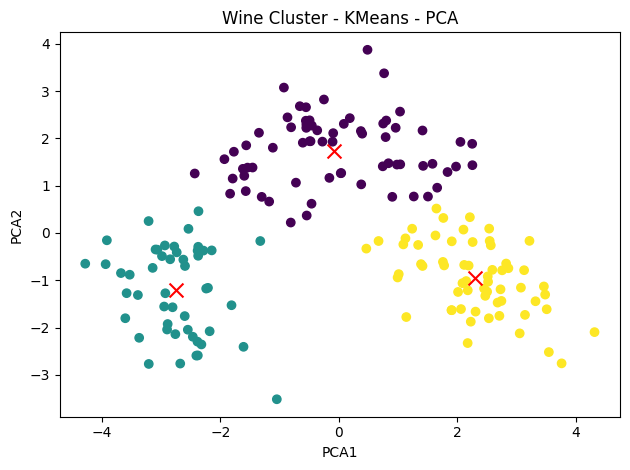

In [65]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init= 'auto', random_state = 42)
kmeans.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster - KMeans - PCA')
plt.tight_layout()
plt.show()

**Visualize the best Agglomerative Results on PCA-reduced data**

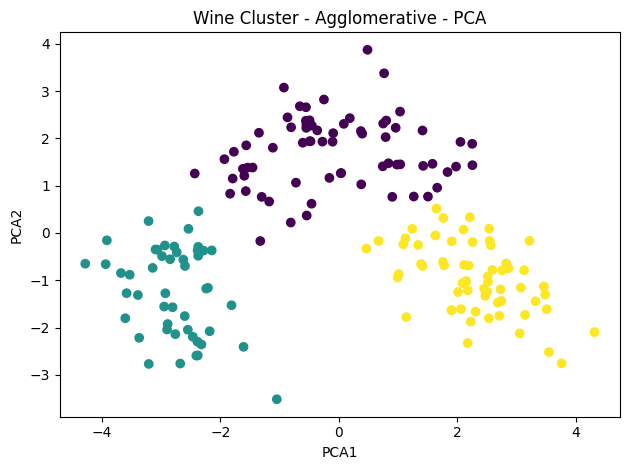

In [66]:
reduced_data = PCA(n_components=2).fit_transform(X)
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_model.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=agg_model.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster - Agglomerative - PCA')
plt.tight_layout()